In [1]:
!nvidia-smi


Sat Jul 19 10:17:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [3]:
import ultralytics
ultralytics.checks()


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.9/112.6 GB disk)


In [6]:
from ultralytics import YOLO
from IPython.display import Image

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XtLIEpLBkQKcpyVAQ2AG")
project = rf.workspace("kailash-u6fvb").project("fruit-detect-r0jfn-errjg")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [3]:
dataset.location

'/content/fruit-detect-1'

In [4]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=30 imgsz=640


100% 5.35M/5.35M [00:00<00:00, 111MB/s]
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fruit-detect-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, persp

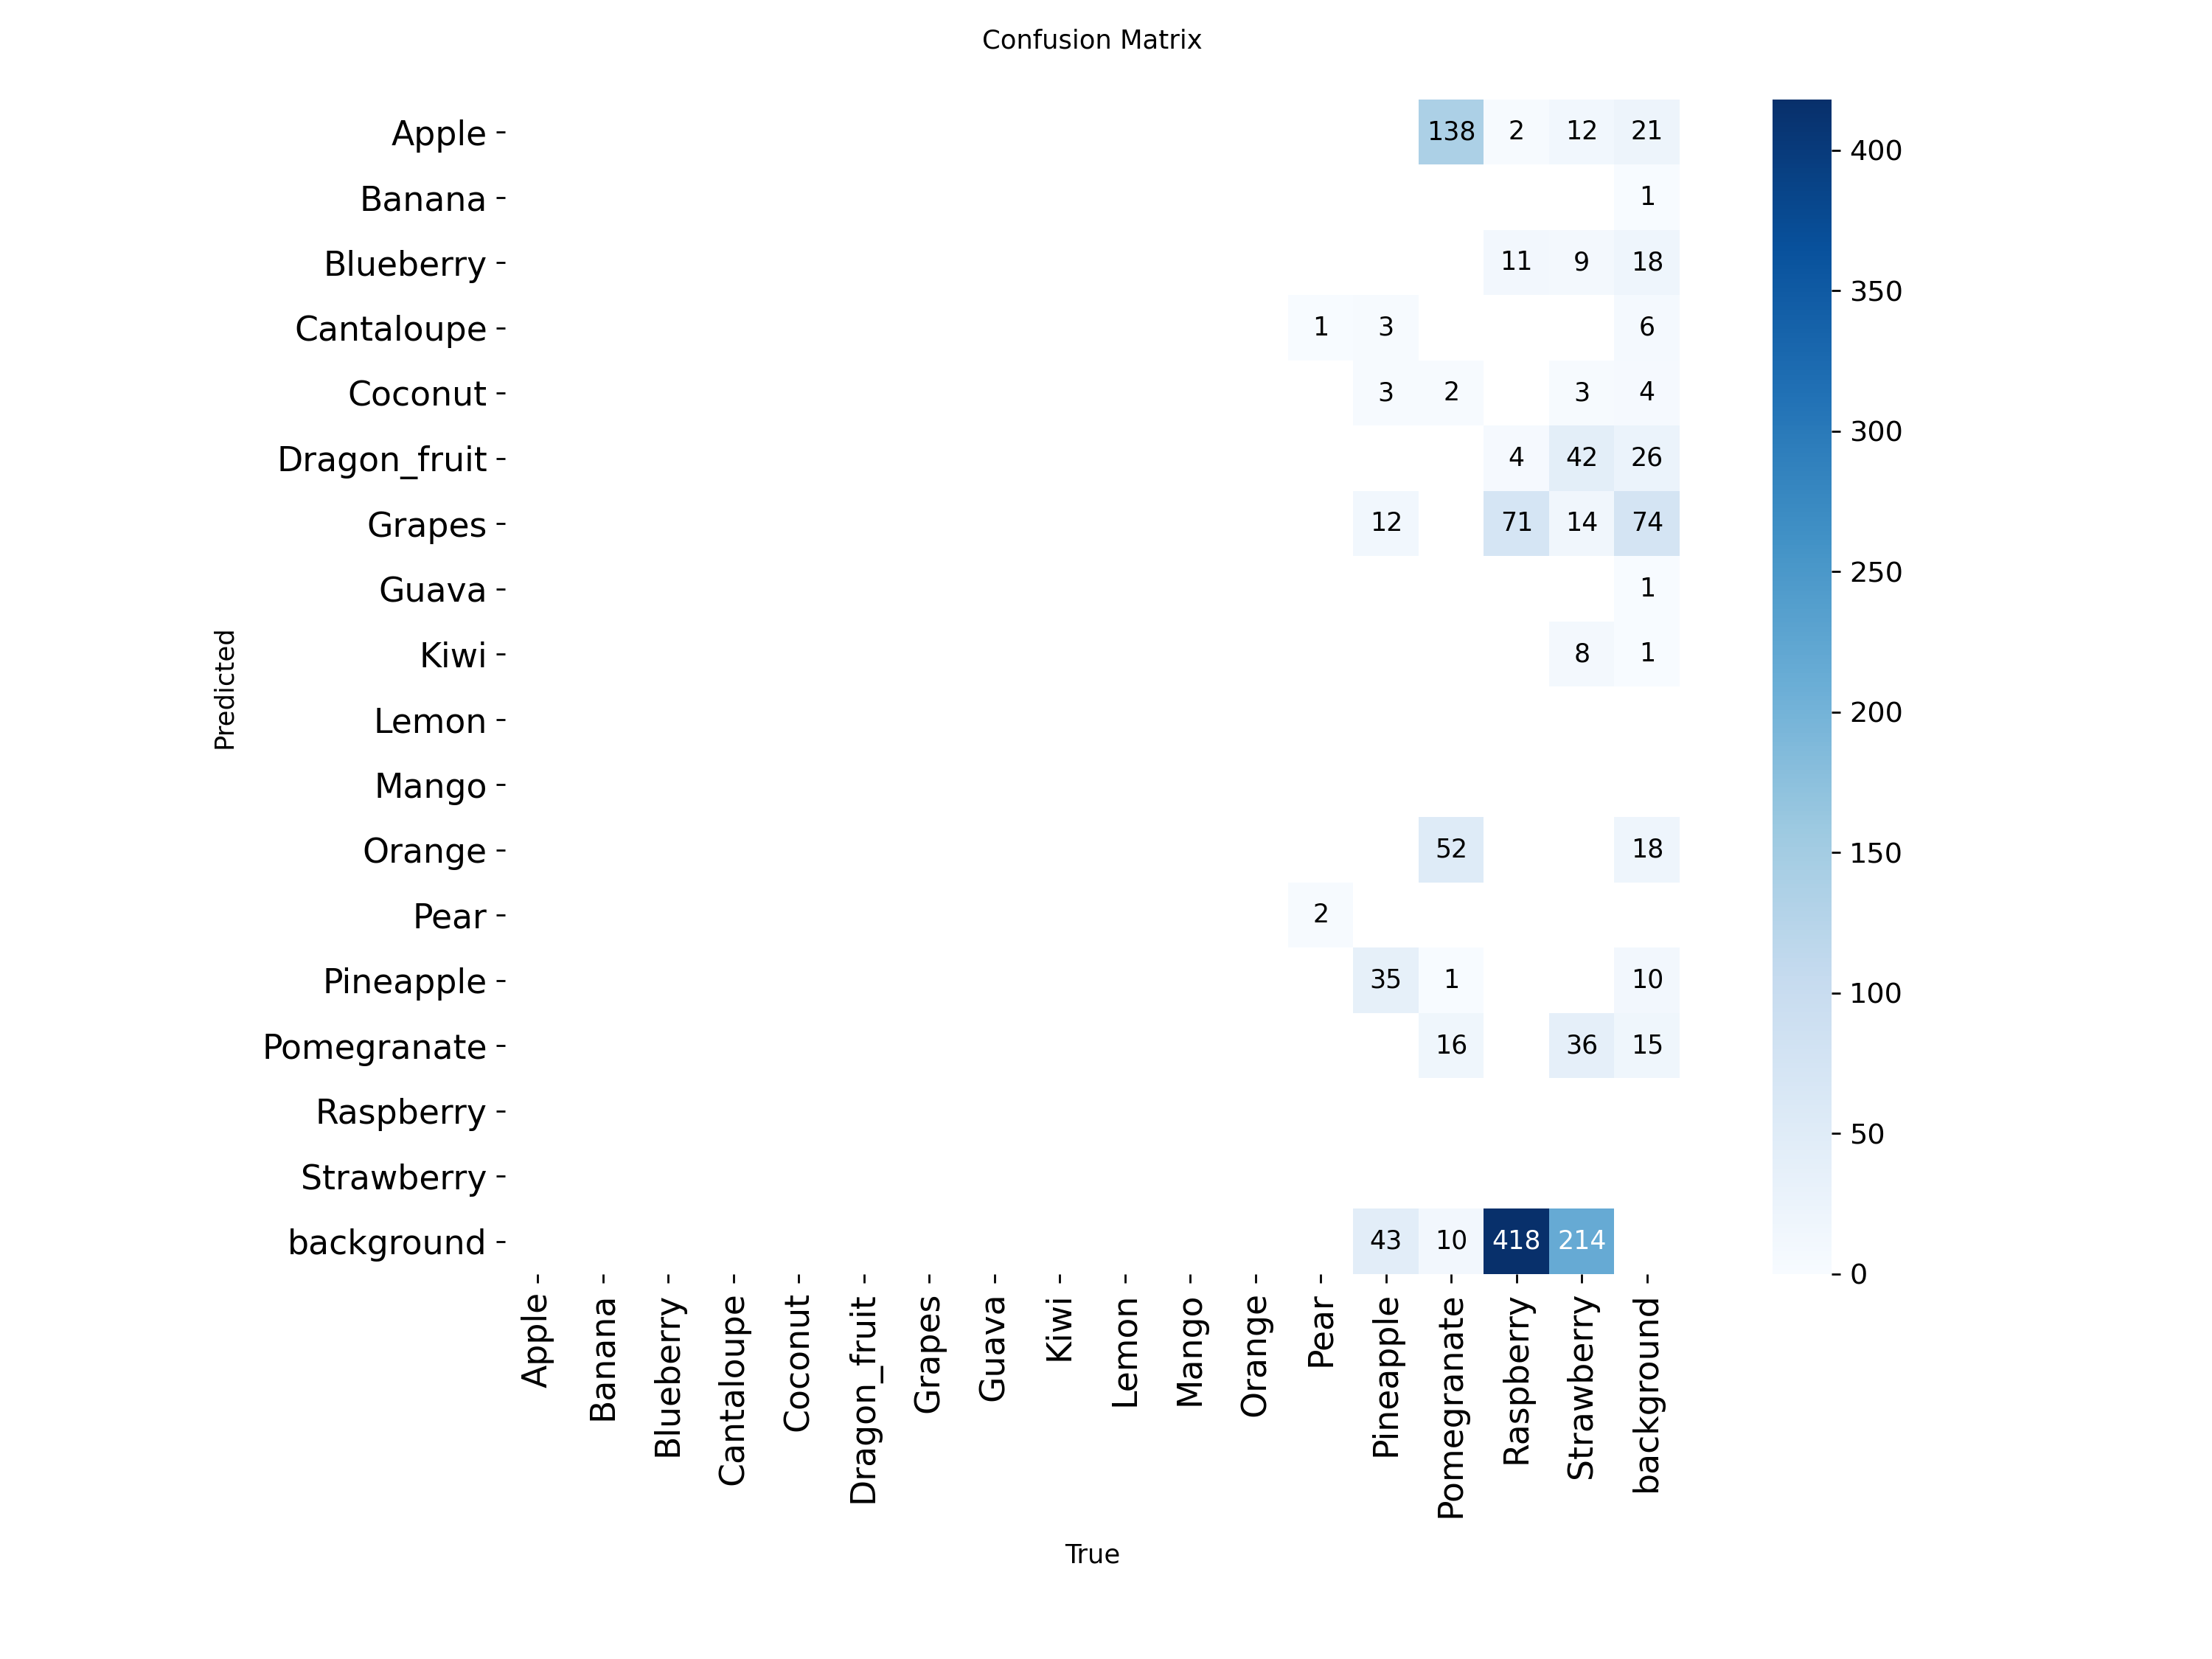

In [7]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

In [8]:
 !yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,585,467 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1873.7±1237.4 MB/s, size: 270.2 KB)
val: Scanning /content/fruit-detect-1/valid/labels.cache... 369 images, 0 backgrounds, 0 corrupt: 100% 369/369 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 24/24 [00:07<00:00,  3.02it/s]
                   all        369       1162      0.577      0.301      0.435      0.323
                  Pear          1          3      0.889          1      0.995       0.83
             Pineapple         40         96      0.724      0.411      0.461      0.246
           Pomegranate        170        219       0.27     0.0959       0.22      0.164
             Raspberry         81        506          1          0      0.502      0.377
            Strawberry         77        338     

In [9]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,585,467 parameters, 0 gradients, 6.3 GFLOPs

image 1/181 /content/fruit-detect-1/test/images/FreshPomegranate-1-_jpg.rf.eec8573201865bc65ca065f7d392cfc1.jpg: 544x640 1 Apple, 1 Orange, 42.6ms
image 2/181 /content/fruit-detect-1/test/images/FreshPomegranate-100-_jpg.rf.f27df789b65e216fa6a95c408595cd31.jpg: 640x512 1 Apple, 43.4ms
image 3/181 /content/fruit-detect-1/test/images/FreshPomegranate-101-_jpg.rf.0f4bc0ca95c1920e13482682c8c1657a.jpg: 608x640 1 Apple, 43.5ms
image 4/181 /content/fruit-detect-1/test/images/FreshPomegranate-102-_jpg.rf.62ac33a4a5fe7f870d5dcff090cc12bf.jpg: 640x640 1 Apple, 9.9ms
image 5/181 /content/fruit-detect-1/test/images/FreshPomegranate-103-_jpg.rf.ccc8e7a8617bd03fd6ee59412011d7b0.jpg: 576x640 1 Apple, 43.2ms
image 6/181 /content/fruit-detect-1/test/images/FreshPomegranate-105-_jpg.rf.0184d4461abc5b9109563652599c3a2f.jpg: 640x608 1 Apple,

In [10]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/fruit.jpg" save=True


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,585,467 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/fruit.jpg: 448x640 1 Kiwi, 46.8ms
Speed: 2.5ms preprocess, 46.8ms inference, 156.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [11]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/images.jpg" save=True


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,585,467 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/images.jpg: 640x448 1 Pineapple, 46.6ms
Speed: 3.4ms preprocess, 46.6ms inference, 156.8ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [12]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/f.jpg" save=True


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,585,467 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/f.jpg: 256x640 3 Grapess, 48.0ms
Speed: 2.0ms preprocess, 48.0ms inference, 132.9ms postprocess per image at shape (1, 3, 256, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [13]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/local-fruits.jpg" save=True


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,585,467 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/local-fruits.jpg: 512x640 4 Bananas, 48.7ms
Speed: 4.3ms preprocess, 48.7ms inference, 147.1ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [14]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/ap.jpg" save=True


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,585,467 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/ap.jpg: 480x640 1 Apple, 44.5ms
Speed: 4.1ms preprocess, 44.5ms inference, 162.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict
